# Lecture 3: Logistic Regression

Here, we'll see examples of how to use the scikit-learn logistic regression class, as well as the statsmodels GLM function, which is much more similar to R's glm function for doing logistic regression.

You can read about the scikit-learn logistic regression function here:

[http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

In [ ]:
%matplotlib inline

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
# sklearn.metrics has a bunch of really handy functions for measuring accuracy in classification
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_curve, roc_auc_score
from sklearn import datasets
import seaborn as sns

:0: FutureWarning: IPython widgets are experimental and may change in the future.


Let's load the famous iris dataset, which has measured features of different species of iris:

In [ ]:
iris = datasets.load_iris()

Let's get some documentation on the iris data set we just loaded.

In [ ]:
?datasets.load_iris

Notice that the ```iris``` object we created using ```load_iris()``` is not just a data frame.  It is actually an object that stores
  * ```data```: the features, or $X$, data
  * ```target```: the labels, or $Y$, data, stored as numbers
  * ```target_names```: the meaning of the numerical labels stored in ```target```
  * ```feature_names```: the column names for the features
  * ```DESCR```: a description of the dataset

In [ ]:
# We see that we have four predictors
iris.data

In [ ]:
# The output is coded as either 0,1, or 2
iris.target

In [ ]:
# Each output code is a type of iris
iris.target_names

In [25]:
# The predictors are different measurements of the plant (sepal and pedal)
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [24]:
# The description tells us more information about the data set
print(iris.DESCR)

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

Let's make a dataset which is only the first two predictors to keep things simple.  Notice that in this case, we have a response with more than two classes.  This is referrred to as the *multiclass* case.  scikit-learn lets you do this without any extra work.  On the backend, it will actually fit one binary logistic regression per class, trying to predict if each observation belongs to that class or not.  In order to make a prediction, it first makes predictions using each of the binary logistic regressions, then assigns the observation to the class with the highest score. This is call the 'one-vs-all' or 'one-vs-rest' approach.

In [29]:
X = iris.data[:, :2]
y = iris.target

In [30]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

Let's construct and fit our scikit-learn classifier, which should follow the by-now-familiar workflow of construct, fit, predict that we saw with k-nearest neighbors and linear regression:

In [31]:
# Construct a logistic regression.  The parameter 'C' tells Python how much regularization to do when fitting the model
# We'll get to regularization next week, but basically when C is large, we're doing standard logistic regression.
logit = LogisticRegression(C=1e5)

In [34]:
logit.fit(X, y)

LogisticRegression(C=100000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

Notice the second argument in the output above, ```class_weight```.  This argument lets you penalize misclassification differently based on the class.  For instance, if false negatives are very important (cases when $y_{i}=1$ but $\hat{y}_{i}=0$), then you can more heavily penalize them.

Next, let's make predictions on our dataset.  In classification, there are usually two ways to predict -predict the probability of an observation being in each class, or actually assign an observation to a single class.

In [36]:
# First, using the .predict() call we get back predicted class assignments
training_preds = logit.predict(X)
training_preds

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 2, 2, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 2, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1,
       2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

In [37]:
# Second, using the predict_proba() call we get back the probability that each observation is a 0, 1, or 2
training_probs = logit.predict_proba(X)
training_probs

array([[  9.05823905e-01,   6.81672013e-02,   2.60088939e-02],
       [  7.64631786e-01,   2.16376590e-01,   1.89916235e-02],
       [  8.46908157e-01,   1.42190177e-01,   1.09016662e-02],
       [  8.15654921e-01,   1.75608861e-01,   8.73621791e-03],
       [  9.29624966e-01,   5.11184180e-02,   1.92566160e-02],
       [  9.35726243e-01,   2.14566456e-02,   4.28171113e-02],
       [  9.06375214e-01,   8.58410376e-02,   7.78374790e-03],
       [  8.90004223e-01,   8.86750246e-02,   2.13207520e-02],
       [  7.44055159e-01,   2.50433077e-01,   5.51176369e-03],
       [  8.02826805e-01,   1.78629207e-01,   1.85439881e-02],
       [  9.12881392e-01,   3.90028926e-02,   4.81157159e-02],
       [  8.99673219e-01,   8.73972775e-02,   1.29295031e-02],
       [  7.69594524e-01,   2.15588498e-01,   1.48169774e-02],
       [  7.86468274e-01,   2.09354239e-01,   4.17748690e-03],
       [  8.85195466e-01,   1.56532847e-02,   9.91512491e-02],
       [  9.32634691e-01,   4.55482910e-03,   6.2810479

In [39]:
# If we want to see where we made mistakes, we can do that by finding obserations where
# our predictions don't match the true labels
np.where(training_preds!=y)

(array([ 50,  51,  52,  54,  56,  58,  65,  70,  74,  75,  76,  77,  85,
         86,  91,  97, 101, 106, 113, 114, 119, 121, 123, 126, 134, 138,
        142, 146, 149]),)

In [41]:
# Here we look at one of the mistakes (the first one in the list above) in more detail.
num = 50
print y[num]
print training_probs[num]

1
[  8.72446141e-22   2.06253776e-01   7.93746224e-01]


### Evaluating the Classifier Performance

At the very top, we imported several functions from sklearn.metrics ([http://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics)).

First, we'll build a confusion matrix.  Note that the confusion matrix setup for the case with two cases readily extends to the case with more than two classes.

In [ ]:
?confusion_matrix

In [46]:
# Gives us what we want, but it's hard to read
confusion_matrix(y, training_preds)

array([[50,  0,  0],
       [ 0, 34, 16],
       [ 0, 13, 37]])

We can also use the crosstab function in pandas, which has the advantage that it's clear which are rows and which are columns (http://pandas.pydata.org/pandas-docs/version/0.15.1/generated/pandas.crosstab.html):

In [49]:
pd.crosstab(index=y, columns=training_preds, rownames=['True'], colnames=['Predicted'])

Predicted,0,1,2
True,,,
0,50,0,0
1,0,34,16
2,0,13,37


Based on the confusion matrix, it looks like our model does a good job of predicting the label $0$ ('setosa'), but gets somewhat confused when trying to distinguish labels $1$ and $2$.

Next, we calculate the accuracy score for our predictions.  This is just the 1-misclassification rate, or the proportion of observations that were *correctly* classified.

In [51]:

print accuracy_score(y, training_preds)

0.806666666667


The `classification_report` function will easily give us some other metrics:

In [54]:
print classification_report(y, training_preds, labels=[0,1,2], target_names=['class 0', 'class 1', 'class 2'])

             precision    recall  f1-score   support

    class 0       1.00      1.00      1.00        50
    class 1       0.72      0.68      0.70        50
    class 2       0.70      0.74      0.72        50

avg / total       0.81      0.81      0.81       150



In lecture, we described precision and recall in terms of true positives, false positives, etc., in the binary classification case.  Even though we're now dealing with more than two classes, we can still these metrics for each class.  For example, recall (# True Positive / # Actual Positives) for class 0 is just the number of observations assigned to class 0 that were actually in class 0 divided by the number of actual observations in class 0.  The same idea applies when calculating precision for each class.  The *f1-score*, which applies even in the binary class setting, is just a combination of precision and recall ($2\cdot \text{harmonic mean}$) with the best possible value of 1 and worst possible value 0.

To make an ROC curve, let's simplify things and train a binary version rather than a multi-class version of the classifier.  We'll create a new set of binary responses equal to 1 when the origial class is 2, and 0 otherwise.

In [57]:
y_bin = (y==2).astype("int")

logit_binary = LogisticRegression(C=1e5)
logit_binary.fit(X, y_bin)

bin_preds = logit_binary.predict_proba(X)[:, 1] # In binary response case, probability of 0 is 1 - probability of 1.
bin_preds

array([ 0.02871297,  0.02483682,  0.01287231,  0.01071068,  0.02071439,
        0.04575816,  0.00858778,  0.02395579,  0.00740774,  0.02309832,
        0.05270749,  0.01437133,  0.01925294,  0.0053117 ,  0.11200697,
        0.06734736,  0.04575816,  0.02871297,  0.10137136,  0.02310527,
        0.06502151,  0.02484428,  0.00741   ,  0.0331636 ,  0.01437133,
        0.03198735,  0.02395579,  0.03693718,  0.03967496,  0.01287231,
        0.01789812,  0.06502151,  0.02396299,  0.04741599,  0.02309832,
        0.02769006,  0.07728785,  0.02309832,  0.00688061,  0.0308607 ,
        0.02227755,  0.01490073,  0.00593556,  0.02227755,  0.02310527,
        0.01925294,  0.02310527,  0.00995088,  0.04112189,  0.02575712,
        0.83873714,  0.52164216,  0.81196618,  0.16972174,  0.65574497,
        0.19176287,  0.43829153,  0.03826557,  0.69644247,  0.06500279,
        0.06498407,  0.25606043,  0.44734927,  0.3842727 ,  0.14513026,
        0.71952174,  0.1361472 ,  0.24901464,  0.57672897,  0.18

The `roc_curve` function returns three arrays.  One for the false positive rate, one for the true positive rate, and one for the probability thresholds that correspond to each point.  We don't plot the thresholds directly in an ROC curve, but it's by tracing out the true positive and false positive rates as we range over the threhold that we obtain the curve.

In [60]:
fpr, tpr, thresholds = roc_curve(y_bin, bin_preds)

In [62]:
thresholds

array([ 0.98049838,  0.86671432,  0.83873714,  0.81196618,  0.80620055,
        0.75549093,  0.73427835,  0.71952174,  0.69644247,  0.6885596 ,
        0.65574497,  0.62144653,  0.62137407,  0.61262609,  0.59484136,
        0.5858889 ,  0.58581417,  0.57672897,  0.53087141,  0.52164216,
        0.4658706 ,  0.44742542,  0.43829153,  0.4200795 ,  0.40200848,
        0.3842727 ,  0.36683938,  0.35828393,  0.3247944 ,  0.30870657,
        0.26317598,  0.25606043,  0.24907224,  0.24901464,  0.23537189,
        0.22877468,  0.22872034,  0.21586985,  0.19176287,  0.16456859,
        0.15950055,  0.15459995,  0.14056012,  0.1361472 ,  0.06734736,
        0.06502151,  0.04741599,  0.04575816,  0.03693718,  0.03562144,
        0.0308607 ,  0.02871297,  0.02396299,  0.02395579,  0.02309832,
        0.02227755,  0.02071439,  0.01925294,  0.01490073,  0.01287231,
        0.0053117 ])

Now, we'll plot the ROC curve, but also the baseline 'random guessing' diagonal for reference.

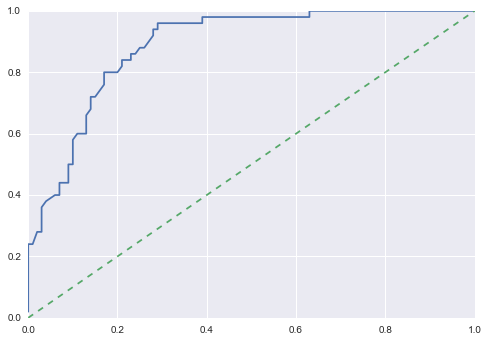

In [64]:
fpr_rand = tpr_rand = np.linspace(0, 1, 10) # Construct the random baseline

plt.plot(fpr, tpr) # Add the ROC curve to our plot
plt.plot(fpr_rand, tpr_rand, linestyle='--') # Add the random baseline to our plot
plt.show() # Show the plot

And we can easily calculate the AUC:

In [66]:
roc_auc_score(y_bin, bin_preds)

0.88730000000000009

We can also plot the **lift curve**.  The lift curve tries to answer the following question: if you rank ordered all of your observations in decreasing order of their probability of being a positive, what percent of the overall number of observations would you need to target in order to have reached a specified percent of the *actual* positives in the population?

A natural case is in marketing, where you often want to launch a direct marketing campaign to acquire new customers.  You have a limited budget, so you can't reach everyone.  Therefore, you cut your target by taking the top $5\%$, $10\%$, etc., of individuals based on their probability of accepting your offer. The idea is that, if the model is good, then that target should contain a sizable fraction of the consumers you actually have a chance of converting.

Unforunately, we have to make a lift curve by hand -it's not built into sklearn.

In [97]:
# First, order the scores from highest to lowest.
order = np.argsort(bin_preds)
# this notation means go from beginning to end by -1, which is reverse order
decreasing_order = order[::-1]

In [98]:
bin_preds[decreasing_order]

array([ 0.98049838,  0.97744239,  0.97392025,  0.97197219,  0.9664242 ,
        0.95370779,  0.95201752,  0.93419726,  0.91038171,  0.8974869 ,
        0.8867466 ,  0.86671432,  0.83873714,  0.81196618,  0.81196618,
        0.81196618,  0.80620055,  0.80035083,  0.80030161,  0.78190662,
        0.75549093,  0.73427835,  0.73427835,  0.71952174,  0.71952174,
        0.71952174,  0.69644247,  0.6885596 ,  0.6885596 ,  0.68049895,
        0.65574497,  0.62144653,  0.62144653,  0.62144653,  0.62137407,
        0.61262609,  0.59484136,  0.59484136,  0.5858889 ,  0.58581417,
        0.58581417,  0.57680416,  0.57672897,  0.54933675,  0.5401561 ,
        0.53087141,  0.52164216,  0.52164216,  0.51232115,  0.4658706 ,
        0.44742542,  0.44734927,  0.44734927,  0.43829153,  0.43829153,
        0.4382157 ,  0.4200795 ,  0.40200848,  0.40200848,  0.3842727 ,
        0.36683938,  0.36683938,  0.35828393,  0.35821311,  0.3247944 ,
        0.30870657,  0.26317598,  0.25606043,  0.25606043,  0.24

In [101]:
# Now we create a loop that mimics the process of cutting a target based on the top 1%, 2%, 3%, ..., 100% of scores.
# For each cutoff, we calculate the fraction of actual positives we've identified.

# As a benchmark, the random guessing model will only accumlate actual positives in proportion to the actual
# fraction of overall observtions that were positives.  For instance, if 20% of the population is actually a 1,
# then when you randomly select 10% of the population, you'd expect 20% of that group to be a 1.

total_ones = y_bin.sum() # Number of actual positives
num_examples = len(y_bin) # Number of observations
percent_ones = float(total_ones)/float(num_examples) # Fraction of positives in population
print "We have %s total 1's out of %s training examples." % (total_ones, num_examples)

percent_targeted = np.linspace(0, 1, 100) # Create a sequence cutoffs (top 1%, top 2%, etc.)

rands, hits = [], []
for p in percent_targeted: # Loop over each cutoff point
    
    # for random targeting, we just get a constant fraction
    rands.append(p)
    
    # for a real model, we take the p percent highest scorers
    # and see how many ones there are
    n_ones = y_bin[decreasing_order[:int(p*num_examples)]].sum()
    hits.append(float(n_ones)/float(total_ones)) # Fraction of actual positives that we've identified thus far.

We have 50 total 1's out of 150 training examples.


<function matplotlib.pyplot.show>

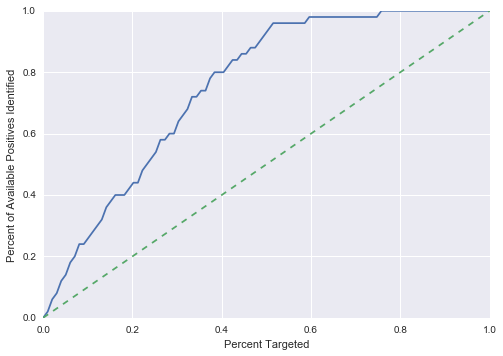

In [103]:
plt.plot(percent_targeted, hits)
plt.plot(percent_targeted, rands, linestyle='--')
plt.xlabel('Percent Targeted')
plt.ylabel('Percent of Available Positives Identified')
plt.show

In this example, if we had used our model to create a target list of customers for acquisition, then we would have identified roughly 40% of conversions by only targeting 20% of the overall population.  In general, the more a lift curve is pulled to the upper left, the better the model.  However, the shape of an optimal lift curve changes depending on the actual fraction of positives in the population, so comparing lift curves across data sets is more difficult than comparing ROC curves.

## Statsmodels

### Using A Formula to Fit to a Pandas Dataframe

[http://statsmodels.sourceforge.net/devel/examples/notebooks/generated/glm_formula.html](http://statsmodels.sourceforge.net/devel/examples/notebooks/generated/glm_formula.html)

In [105]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

The Star98 dataset is an educational dataset from California counties.  The column `NABOVE` represents "the number of 9th graders scoring over the national median value on the mathematics exam."  We will create a logistic regression to predict whether or not the percent of 9th graders scoring above the national medial value on the math exam exceeds 50%.

[http://statsmodels.sourceforge.net/0.6.0/datasets/generated/star98.html](http://statsmodels.sourceforge.net/0.6.0/datasets/generated/star98.html)

In [117]:
star98 = sm.datasets.star98.load_pandas().data # Load the data

In [118]:
star98.head() # Preview the data 

,NABOVE,NBELOW,LOWINC,PERASIAN,PERBLACK,PERHISP,PERMINTE,AVYRSEXP,AVSALK,PERSPENK,...,PCTCHRT,PCTYRRND,PERMINTE_AVYRSEXP,PERMINTE_AVSAL,AVYRSEXP_AVSAL,PERSPEN_PTRATIO,PERSPEN_PCTAF,PTRATIO_PCTAF,PERMINTE_AVYRSEXP_AVSAL,PERSPEN_PTRATIO_PCTAF
0,452.0,355.0,34.39730,23.299300,14.235280,11.411120,15.91837,14.70646,59.15732,4.445207,...,0.0,22.222220,234.102872,941.68811,869.9948,96.50656,253.52242,1238.1955,13848.8985,5504.0352
1,144.0,40.0,17.36507,29.328380,8.234897,9.314884,13.63636,16.08324,59.50397,5.267598,...,0.0,0.000000,219.316851,811.41756,957.0166,107.68435,340.40609,1321.0664,13050.2233,6958.8468
2,337.0,234.0,32.64324,9.226386,42.406310,13.543720,28.83436,14.59559,60.56992,5.482922,...,0.0,0.000000,420.854496,1746.49488,884.0537,103.92435,295.75929,1022.4252,25491.1232,5605.8777
3,395.0,178.0,11.90953,13.883090,3.796973,11.443110,11.11111,14.38939,58.33411,4.165093,...,0.0,7.142857,159.882095,648.15671,839.3923,90.11341,204.34375,1061.4545,9326.5797,4421.0568
4,8.0,57.0,36.88889,12.187500,76.875000,7.604167,43.58974,13.90568,63.15364,4.324902,...,0.0,0.000000,606.144976,2752.85075,878.1943,81.22097,226.54248,983.7059,38280.2616,4254.4314


In [124]:
## Let's filter to a subset of columns, calculate the percentage of students above
## the national median, and create a new binary variance that indicates if 
## the percent of students above the national median excdeeds 50%

dta = star98[['NABOVE', 'NBELOW', 'LOWINC', 'PERASIAN', 'PERBLACK', 'PERHISP',
              'PCTCHRT', 'PCTYRRND', 'PERMINTE', 'AVYRSEXP', 'AVSALK',
              'PERSPENK', 'PTRATIO', 'PCTAF']]
percent_above = dta['NABOVE'] / (dta['NABOVE'] + dta['NBELOW'])
dta = dta.drop(['NABOVE', 'NBELOW'], axis=1)
dta["SUCCESS"] = percent_above>0.5
dta["SUCCESS"] = dta["SUCCESS"].astype("int")
dta.head()

,LOWINC,PERASIAN,PERBLACK,PERHISP,PCTCHRT,PCTYRRND,PERMINTE,AVYRSEXP,AVSALK,PERSPENK,PTRATIO,PCTAF,SUCCESS
0,34.39730,23.299300,14.235280,11.411120,0.0,22.222220,15.91837,14.70646,59.15732,4.445207,21.71025,57.03276,1
1,17.36507,29.328380,8.234897,9.314884,0.0,0.000000,13.63636,16.08324,59.50397,5.267598,20.44278,64.62264,1
2,32.64324,9.226386,42.406310,13.543720,0.0,0.000000,28.83436,14.59559,60.56992,5.482922,18.95419,53.94191,1
3,11.90953,13.883090,3.796973,11.443110,0.0,7.142857,11.11111,14.38939,58.33411,4.165093,21.63539,49.06103,1
4,36.88889,12.187500,76.875000,7.604167,0.0,0.000000,43.58974,13.90568,63.15364,4.324902,18.77984,52.38095,0


Next, we create the formula representing the logistic regression, as we would in R

In [126]:
formula = 'SUCCESS ~ LOWINC + PERASIAN + PERBLACK + PERHISP + PCTCHRT + \
           PCTYRRND + PERMINTE*AVYRSEXP*AVSALK + PERSPENK*PTRATIO*PCTAF'

Finally, we fit the logistic regression by using statsmodels' ```glm``` call, and indicating that we're doing logistic regression by setting the ```family``` argument to binomial (again, as we do in R).

In [127]:
mod1 = smf.glm(formula=formula, data=dta, family=sm.families.Binomial()).fit()
mod1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                SUCCESS   No. Observations:                  303
Model:                            GLM   Df Residuals:                      282
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -75.162
Date:                Wed, 12 Oct 2016   Deviance:                       150.32
Time:                        08:28:54   Pearson chi2:                     167.
No. Iterations:                    10                                         
============================================================================================
                               coef    std err          z      P>|z|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------------
Intercept                  103.2251     60.567      1.704      0.088       -15.484   221.934
LOWINC                      -0.1344      0.025     -5.428      0.000        -0.183    -0.086
PERASIAN                     0.1567      0.043      3.662      0.000         0.073     0.241
PERBLACK                    -0.1568      0.051     -3.069      0.002        -0.257    -0.057
PERHISP                     -0.0460      0.021     -2.138      0.033        -0.088    -0.004
PCTCHRT                     -0.0255      0.035     -0.723      0.470        -0.094     0.044
PCTYRRND                    -0.0119      0.012     -1.025      0.306        -0.035     0.011
PERMINTE                    -3.9382      4.239     -0.929      0.353       -12.246     4.369
AVYRSEXP                    -2.6731      3.176     -0.842      0.400        -8.898     3.552
PERMINTE:AVYRSEXP            0.2827      0.294      0.960      0.337        -0.294     0.860
AVSALK                      -0.6330      0.820     -0.772      0.440        -2.240     0.974
PERMINTE:AVSALK              0.0720      0.073      0.981      0.326        -0.072     0.216
AVYRSEXP:AVSALK              0.0492      0.056      0.876      0.381        -0.061     0.159
PERMINTE:AVYRSEXP:AVSALK    -0.0052      0.005     -1.021      0.307        -0.015     0.005
PERSPENK                   -18.6489     11.248     -1.658      0.097       -40.694     3.396
PTRATIO                     -2.8709      2.303     -1.247      0.213        -7.385     1.643
PERSPENK:PTRATIO             0.8320      0.539      1.544      0.123        -0.224     1.888
PCTAF                       -1.8809      1.305     -1.441      0.150        -4.440     0.678
PERSPENK:PCTAF               0.5528      0.304      1.816      0.069        -0.044     1.149
PTRATIO:PCTAF                0.0838      0.061      1.369      0.171        -0.036     0.204
PERSPENK:PTRATIO:PCTAF      -0.0244      0.015     -1.678      0.093        -0.053     0.004
============================================================================================
"""

In [128]:
print(mod1.params)

Intercept                   103.225061
LOWINC                       -0.134375
PERASIAN                      0.156722
PERBLACK                     -0.156807
PERHISP                      -0.045952
PCTCHRT                      -0.025470
PCTYRRND                     -0.011937
PERMINTE                     -3.938244
AVYRSEXP                     -2.673062
PERMINTE:AVYRSEXP             0.282675
AVSALK                       -0.632951
PERMINTE:AVSALK               0.072025
AVYRSEXP:AVSALK               0.049215
PERMINTE:AVYRSEXP:AVSALK     -0.005188
PERSPENK                    -18.648906
PTRATIO                      -2.870892
PERSPENK:PTRATIO              0.832023
PCTAF                        -1.880869
PERSPENK:PCTAF                0.552780
PTRATIO:PCTAF                 0.083849
PERSPENK:PTRATIO:PCTAF       -0.024427
dtype: float64
